# Aula 10 - CNN (Redes Neurais Convolucionais)

Tópicos da aula de Hoje:

* Filtros em imagens
* Convoluções
* Camadas Conv2D
* Camadas de Pooling

In [2]:
import pandas as pd
import numpy as np
from scipy import signal, stats

import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

from ipywidgets import interact

# Rede Neural - Modelo

Modelo disponível em: https://www.kaggle.com/datamunge/sign-language-mnist

baixar e extrair em uma pasta com nome slm_dataset

In [3]:
train = pd.read_csv('slm_dataset\sign_mnist_train\sign_mnist_train.csv')
test = pd.read_csv('slm_dataset\sign_mnist_test\sign_mnist_test.csv')

In [4]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [6]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [14]:
x_train = np.array(train.iloc[:,1:])
y_train = np.array(train.iloc[:,0])

x_test = np.array(test.iloc[:,1:])
y_test = np.array(test.iloc[:,0])

In [29]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27455, 784), (27455, 25), (7172, 784), (7172, 25))

In [20]:
x_train = x_train/255.
x_test = x_test/255.

D -> [0, 0, 0, 1, 0, 0, ..., 0]

A -> [1, 0, 0, 0, ...]

B -> [0, 1, 0, 0, ...]

In [24]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [28]:
y_train.shape, y_test.shape

((27455, 25), (7172, 25))

In [40]:
def plot_image(i):
    plt.imshow(x_train[i, :].reshape((28, 28)), cmap=plt.cm.binary)
    plt.title(str(class_names[np.argmax(y_train[i])]))

In [41]:
interact(plot_image, i=10)

interactive(children=(IntSlider(value=10, description='i', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.plot_image(i)>

# Rede Neural Profunda Conectada

In [47]:
model = tf.keras.models.Sequential()
model.add(Dense(200, activation='relu', input_shape=(784,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='softmax'))

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history = model.fit(x_train, y_train, batch_size=1024, epochs=15,
                    validation_data=(x_test, y_test))

Epoch 1/15
27/27 [==============================] - 1s 9ms/step - loss: 3.0383 - accuracy: 0.1289 - val_loss: 2.8659 - val_accuracy: 0.2154
Epoch 2/15
27/27 [==============================] - 0s 5ms/step - loss: 2.6013 - accuracy: 0.3052 - val_loss: 2.4044 - val_accuracy: 0.2861
Epoch 3/15
27/27 [==============================] - 0s 5ms/step - loss: 2.1172 - accuracy: 0.4289 - val_loss: 2.0319 - val_accuracy: 0.4127
Epoch 4/15
27/27 [==============================] - 0s 5ms/step - loss: 1.7724 - accuracy: 0.5081 - val_loss: 1.7813 - val_accuracy: 0.4842
Epoch 5/15
27/27 [==============================] - 0s 5ms/step - loss: 1.5508 - accuracy: 0.5731 - val_loss: 1.6440 - val_accuracy: 0.5159
Epoch 6/15
27/27 [==============================] - 0s 4ms/step - loss: 1.4003 - accuracy: 0.6040 - val_loss: 1.5706 - val_accuracy: 0.5231
Epoch 7/15
27/27 [==============================] - 0s 4ms/step - loss: 1.2719 - accuracy: 0.6409 - val_loss: 1.4612 - val_accuracy: 0.5424
Epoch 8/15
27/27 [==

# Convolução

In [59]:
t = np.linspace(0, 20, 2000)
y1 = signal.sawtooth(2*np.pi*0.4*t, 0.5)

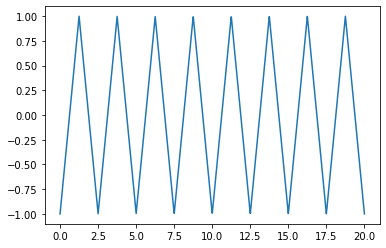

In [60]:
plt.plot(t, y1)

In [68]:
def create_norm(centro):
    y2 = stats.norm.pdf(t, centro, 0.4)
    return y2

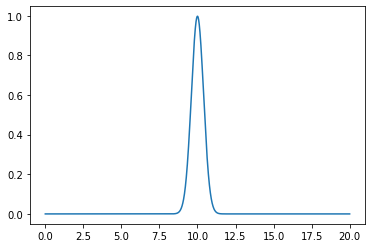

In [69]:
y2 = create_norm(10)
plt.plot(t, y2)

In [73]:
def plot_conv_functions(centro):
    y2 = create_norm(centro)
    plt.plot(t, y1)
    plt.plot(t, y2)
    plt.title(str((y1*y2).sum()))

In [74]:
interact(plot_conv_functions, centro=10)

interactive(children=(IntSlider(value=10, description='centro', max=30, min=-10), Output()), _dom_classes=('wi…

<function __main__.plot_conv_functions(centro)>

In [76]:
pts_varredura = np.linspace(0, 20, 2000)
varredura = np.zeros((2000,))
for i, v in enumerate(pts_varredura):
    y2 = create_norm(v)
    varredura[i] = (y1*y2).sum()

In [78]:
def plot_conv_functions_all(centro):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    y2 = create_norm(centro)
    ax1.plot(t, y1)
    ax1.plot(t, y2)
    ax2.plot(t, varredura)

In [79]:
interact(plot_conv_functions_all, centro=10)

interactive(children=(IntSlider(value=10, description='centro', max=30, min=-10), Output()), _dom_classes=('wi…

<function __main__.plot_conv_functions_all(centro)>

## Conv2D

In [80]:
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image

In [81]:
def convolve2D(image, kernel, padding=0, strides=1):
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

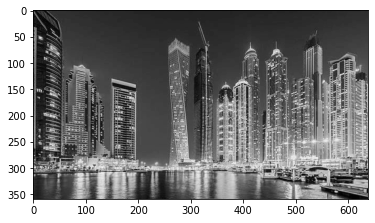

In [85]:
image = processImage('Image.jpeg')
plt.imshow(image, cmap='gray')

In [83]:
image.shape

(359, 638)

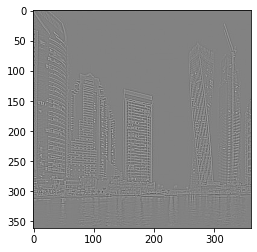

In [84]:
# Edge Detection Kernel
kernel = np.array([[-1, -1, -1], 
                   [-1, 8, -1], 
                   [-1, -1, -1]])
output = convolve2D(image, kernel, padding=2)
cv2.imwrite('2DConvolved.jpg', output)
plt.imshow(output, cmap='gray')

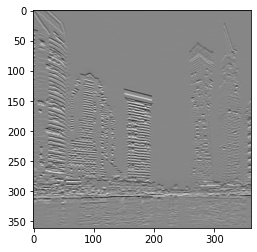

In [86]:
kernel = np.array([[-1, -2, -1], 
                   [0 , 0 ,  0], 
                   [ 1,  2,  1]])
output = convolve2D(image, kernel, padding=2)
cv2.imwrite('2DConvolved.jpg', output)
plt.imshow(output, cmap='gray')

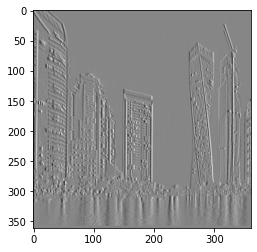

In [87]:
kernel = np.array([[-1,  0,  1], 
                   [-2 , 0 , 2], 
                   [ -1, 0,  1]])
output = convolve2D(image, kernel, padding=2)
cv2.imwrite('2DConvolved.jpg', output)
plt.imshow(output, cmap='gray')

# CNN

In [91]:
print(x_train.shape, x_test.shape)

(27455, 28, 28, 1) (7172, 28, 28, 1)


In [90]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [102]:
model = tf.keras.models.Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,3)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), strides=1))
model.add(MaxPooling2D(pool_size=(2,3)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(25, activation='softmax'))

In [103]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
history = model.fit(x_train, y_train, batch_size=512, epochs=15, 
                    verbose=1, validation_data=(x_test, y_test))

Epoch 1/15
54/54 [==============================] - 2s 13ms/step - loss: 2.6100 - accuracy: 0.2242 - val_loss: 1.7061 - val_accuracy: 0.4704
Epoch 2/15
54/54 [==============================] - 2s 31ms/step - loss: 1.2089 - accuracy: 0.6148 - val_loss: 0.8951 - val_accuracy: 0.7029
Epoch 3/15
54/54 [==============================] - 1s 9ms/step - loss: 0.6378 - accuracy: 0.7966 - val_loss: 0.5572 - val_accuracy: 0.8037
Epoch 4/15
54/54 [==============================] - 2s 31ms/step - loss: 0.3777 - accuracy: 0.8812 - val_loss: 0.4095 - val_accuracy: 0.8620
Epoch 5/15
54/54 [==============================] - 0s 9ms/step - loss: 0.2451 - accuracy: 0.9272 - val_loss: 0.2924 - val_accuracy: 0.9041
Epoch 6/15
54/54 [==============================] - 2s 32ms/step - loss: 0.1649 - accuracy: 0.9517 - val_loss: 0.2762 - val_accuracy: 0.9138
Epoch 7/15
54/54 [==============================] - 1s 9ms/step - loss: 0.1165 - accuracy: 0.9691 - val_loss: 0.2393 - val_accuracy: 0.9262
Epoch 8/15
54/54

In [ ]:
model.save('meumodelo.h5')